In [1]:
import pandas as pd
iris=pd.read_csv("iris.csv")

In [2]:
iris.head()

,sepal length,sepal width,petal length,petal width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length     150 non-null float64
sepal width      150 non-null float64
petal length     150 non-null float64
petal width      150 non-null float64
flower           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris['flower'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: flower, dtype: int64

In [5]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
len(iris)

150

In [7]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d93ce50>,
      dtype=object)

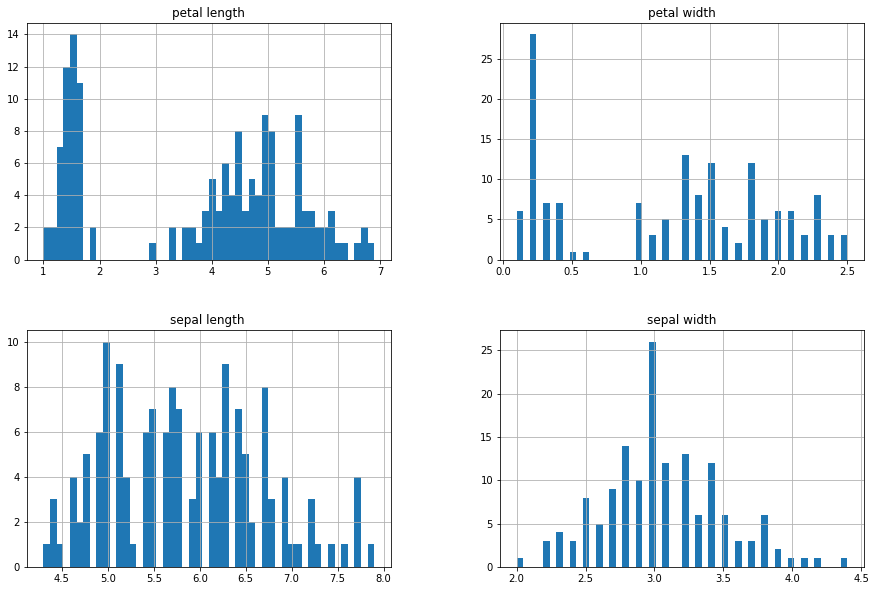

In [8]:
#plottin histogram
import matplotlib.pyplot as plt
iris.hist(bins=50,figsize=(15,10))


In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(iris, test_size=0.2, random_state=42)

In [10]:
print('Rows in train set:',len(train_set))
print('rows in test set:',len(test_set))

Rows in train set: 120
rows in test set: 30


In [11]:
test_set

,sepal length,sepal width,petal length,petal width,flower
73,6.1,2.8,4.7,1.2,Iris-versicolor
18,5.7,3.8,1.7,0.3,Iris-setosa
118,7.7,2.6,6.9,2.3,Iris-virginica
78,6.0,2.9,4.5,1.5,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa
64,5.6,2.9,3.6,1.3,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
82,5.8,2.7,3.9,1.2,Iris-versicolor


In [12]:
#iris['petal width'].value_counts()

from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(iris,iris['sepal width']):
   strat_train_set = iris.loc[train_index]
   strat_test_set = iris.loc[test_index]
                                          

In [13]:
iris=train_set.copy()

In [14]:
#corelations
corr_matrix = iris.corr()
corr_matrix

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.097191,0.862183,0.801485
sepal width,-0.097191,1.000000,-0.422447,-0.357768
petal length,0.862183,-0.422447,1.000000,0.962432
petal width,0.801485,-0.357768,0.962432,1.000000


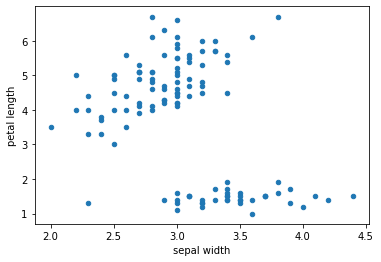

In [15]:
from pandas.plotting import scatter_matrix
iris.plot(kind='scatter',x="sepal width",y="petal length",alpha=1.0)

In [16]:
iris=train_set.drop("flower", axis=1)
iris_labels=train_set["flower"].copy()

In [17]:
iris.shape

(120, 4)

In [18]:
iris_labels.shape

(120,)

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

In [20]:
iris_num_tr = my_pipeline.fit_transform(iris)

In [21]:
iris_num_tr.shape

(120, 4)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
model_1=LogisticRegression()
model_2=LinearSVC()

model_1.fit(iris_num_tr,iris_labels)
model_2.fit(iris_num_tr,iris_labels)

/Users/pawelpratyush/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/pawelpratyush/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [28]:
some_data=iris.iloc[:5]


In [29]:
some_labels=iris_labels.iloc[:5]


In [30]:
prepared_data=my_pipeline.transform(some_data)

In [31]:
model_1.predict(prepared_data)
model_2.predict(prepared_data)

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [32]:
list(some_labels)

['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa']

In [37]:
#evaluating the model
from sklearn.metrics import classification_report, accuracy_score
iris_pred1=model_1.predict(iris_num_tr)
iris_pred2=model_2.predict(iris_num_tr)
n_accuracy1=accuracy_score(iris_labels,iris_pred1)
n_report1=classification_report(iris_labels,iris_pred1)
n_accuracy2=accuracy_score(iris_labels,iris_pred2)
n_report2=classification_report(iris_labels,iris_pred2)

In [38]:
print("Logistic regression :\n")
print('accuracy:',n_accuracy1)
print('Confusion matrix:\n',n_report1)
print("Linear SVC \n")
print('accuracy:',n_accuracy2)
print('Confusion matrix:\n',n_report2)

Logistic regression :

accuracy: 0.8916666666666667
Confusion matrix:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.89      0.78      0.83        41
 Iris-virginica       0.80      0.90      0.84        39

       accuracy                           0.89       120
      macro avg       0.89      0.89      0.89       120
   weighted avg       0.90      0.89      0.89       120

Linear SVC 

accuracy: 0.95
Confusion matrix:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.93      0.93      0.93        41
 Iris-virginica       0.92      0.92      0.92        39

       accuracy                           0.95       120
      macro avg       0.95      0.95      0.95       120
   weighted avg       0.95      0.95      0.95       120



In [39]:
#cross validation
import numpy as np
from sklearn.model_selection import cross_val_predict
scores=cross_val_predict(model_2,iris_num_tr,iris_labels,cv=10)

x=np.array(iris_labels)
n_accuracy=accuracy_score(x,scores)
n_accuracy

0.9333333333333333

In [40]:
#testing the model
X=test_set.drop('flower',axis=1)
Y=test_set['flower'].copy()
X_prepared=my_pipeline.transform(X)
final_pred=model_2.predict(X_prepared)
test_accuracy=accuracy_score(Y,final_pred)
test_accuracy

1.0

In [41]:
test_report=classification_report(Y,final_pred)
print(test_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [42]:
X_prepared

array([[ 0.35451684, -0.57925837,  0.5576453 ,  0.02332414],
       [-0.13307079,  1.67028869, -1.16259727, -1.17620281],
       [ 2.30486738, -1.02916778,  1.81915651,  1.48941263],
       [ 0.23261993, -0.35430366,  0.44296246,  0.42316645],
       [ 1.2077952 , -0.57925837,  0.61498672,  0.28988568],
       [-0.49876152,  0.77046987, -1.27728011, -1.04292204],
       [-0.2549677 , -0.35430366, -0.07311031,  0.15660491],
       [ 1.32969211,  0.09560575,  0.78701097,  1.48941263],
       [ 0.47641375, -1.9289866 ,  0.44296246,  0.42316645],
       [-0.01117388, -0.80421307,  0.09891395,  0.02332414],
       [ 0.84210448,  0.32056046,  0.78701097,  1.08957031],
       [-1.23014297, -0.12934896, -1.33462153, -1.44276436],
       [-0.37686461,  0.99542457, -1.39196294, -1.30948358],
       [-1.10824606,  0.09560575, -1.27728011, -1.44276436],
       [-0.86445224,  1.67028869, -1.27728011, -1.17620281],
       [ 0.59831066,  0.54551516,  0.5576453 ,  0.55644722],
       [ 0.84210448, -0.